# EDA and Feature Engineering

First lets do some EDA on the training data, to determine the distribution of each variable. This could assist in visualising the difference between 1 and 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset - train
training_data = pd.read_csv('../data/raw/train (1).csv')

In [4]:
# inspect the data
training_data.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
Id_old         8000 non-null int64
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(4)
memory usage: 1.3 MB


In [6]:
training_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [7]:
training_data.shape

(8000, 22)

In [8]:
# how many distinct id's are there?
len(training_data.Id.unique())

8000

In [9]:
# check distribution of the target
training_data.TARGET_5Yrs.value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

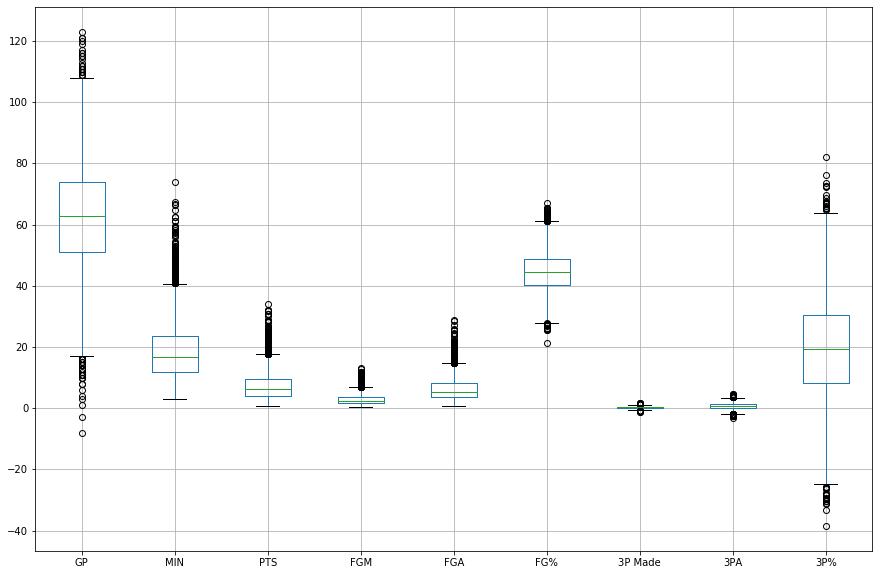

In [10]:
# plot the distribution of the first 5 variables
boxplot = training_data.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%'], figsize = (15,10))

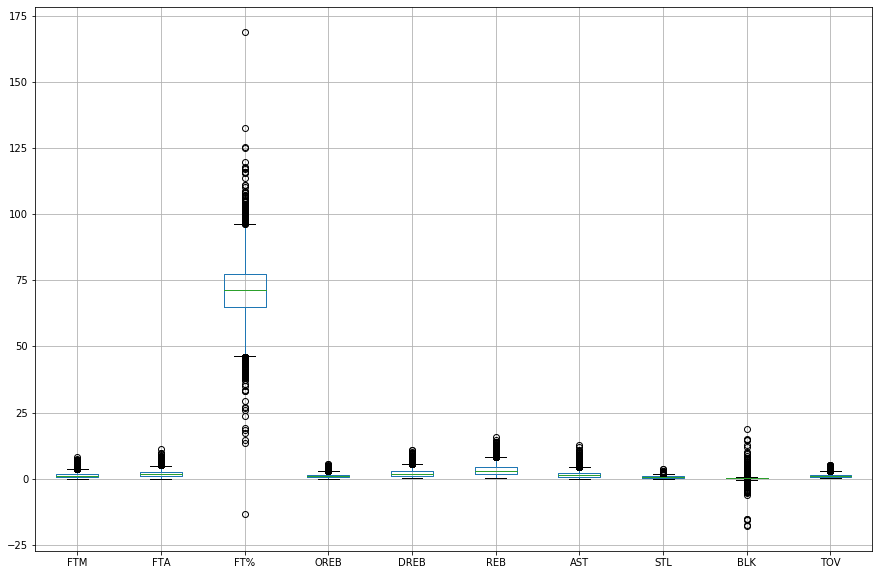

In [11]:
boxplot2 = training_data.boxplot(column=['FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (15,10))

In [12]:
df_train = training_data.copy()

In [16]:
df_one = df_train[df_train['TARGET_5Yrs'] == 1]
print(df_one.shape)

(6669, 22)


In [17]:
df_one.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,...,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.0
mean,6889.367971,7805.355676,64.629330,19.303929,7.618219,2.945899,6.491243,45.045719,0.267102,0.818204,...,2.046544,71.549543,1.138417,2.273024,3.408892,1.683131,0.672065,0.281392,1.306628,1.0
std,3971.261531,2314.677310,16.718539,9.069595,4.396696,1.726871,3.655725,6.093200,0.384559,1.062603,...,1.271339,10.469601,0.802867,1.419288,2.125565,1.386373,0.415717,0.766430,0.735796,0.0
min,4.000000,3799.000000,-3.000000,3.300000,0.900000,0.300000,0.900000,21.300000,-1.100000,-2.600000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-15.700000,0.100000,1.0
25%,3472.000000,5801.000000,53.000000,12.600000,4.400000,1.700000,3.800000,40.900000,0.000000,0.100000,...,1.100000,65.300000,0.500000,1.200000,1.800000,0.700000,0.400000,0.100000,0.800000,1.0
50%,6793.000000,7811.000000,64.000000,17.600000,6.700000,2.600000,5.700000,44.900000,0.300000,0.800000,...,1.800000,71.500000,1.000000,2.000000,3.000000,1.300000,0.600000,0.200000,1.200000,1.0
75%,10326.000000,9824.000000,76.000000,24.500000,9.900000,3.900000,8.400000,49.000000,0.500000,1.500000,...,2.700000,77.600000,1.500000,3.000000,4.500000,2.300000,0.900000,0.400000,1.700000,1.0
max,13798.000000,11798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.0


In [175]:
print(df_one[['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV']].describe())

                GP          MIN          PTS          FGM          FGA  \
count  6669.000000  6669.000000  6669.000000  6669.000000  6669.000000   
mean     64.629330    19.303929     7.618219     2.945899     6.491243   
std      16.718539     9.069595     4.396696     1.726871     3.655725   
min      -3.000000     3.300000     0.900000     0.300000     0.900000   
25%      53.000000    12.600000     4.400000     1.700000     3.800000   
50%      64.000000    17.600000     6.700000     2.600000     5.700000   
75%      76.000000    24.500000     9.900000     3.900000     8.400000   
max     123.000000    73.800000    34.200000    13.100000    28.900000   

               FG%      3P Made          3PA          3P%          FTM  \
count  6669.000000  6669.000000  6669.000000  6669.000000  6669.000000   
mean     45.045719     0.267102     0.818204    19.498081     1.464477   
std       6.093200     0.384559     1.062603    15.974117     0.939564   
min      21.300000    -1.100000    -2

In [18]:
# same for the 0 class
df_zero = df_train[df_train['TARGET_5Yrs'] == 0]
print(df_zero.shape)

(1331, 22)


In [19]:
df_zero.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,...,1331.000000,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000,1331.000000,1331.000000,1331.0
mean,6694.645379,7764.149512,53.501127,14.932682,5.507739,2.111270,4.928325,42.420210,0.251615,0.808340,...,1.452968,70.445304,0.774305,1.644778,2.42562,1.330804,0.531555,0.063937,1.012923,0.0
std,4005.854809,2284.210496,16.057995,7.199469,3.397495,1.309242,2.870119,5.999187,0.381631,1.053072,...,1.017544,10.186075,0.608425,1.108596,1.64057,1.148362,0.341199,1.034295,0.599936,0.0
min,7.000000,3811.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,25.600000,-1.100000,-3.100000,...,0.000000,23.700000,0.000000,0.200000,0.30000,0.000000,0.000000,-17.900000,0.100000,0.0
25%,3182.500000,5787.000000,43.000000,9.700000,2.950000,1.100000,2.800000,38.250000,0.000000,0.100000,...,0.700000,63.700000,0.300000,0.900000,1.20000,0.500000,0.300000,0.000000,0.600000,0.0
50%,6765.000000,7704.000000,53.000000,13.500000,4.700000,1.800000,4.200000,42.100000,0.200000,0.800000,...,1.200000,70.600000,0.600000,1.400000,2.00000,1.000000,0.500000,0.200000,0.900000,0.0
75%,10135.500000,9695.000000,64.000000,18.800000,7.100000,2.700000,6.300000,46.500000,0.500000,1.500000,...,1.900000,76.600000,1.100000,2.100000,3.10000,1.900000,0.700000,0.300000,1.300000,0.0
max,13788.000000,11793.000000,107.000000,51.400000,25.000000,9.800000,21.000000,65.300000,1.600000,4.600000,...,6.500000,124.900000,3.500000,8.500000,11.80000,8.900000,2.300000,9.600000,3.400000,0.0


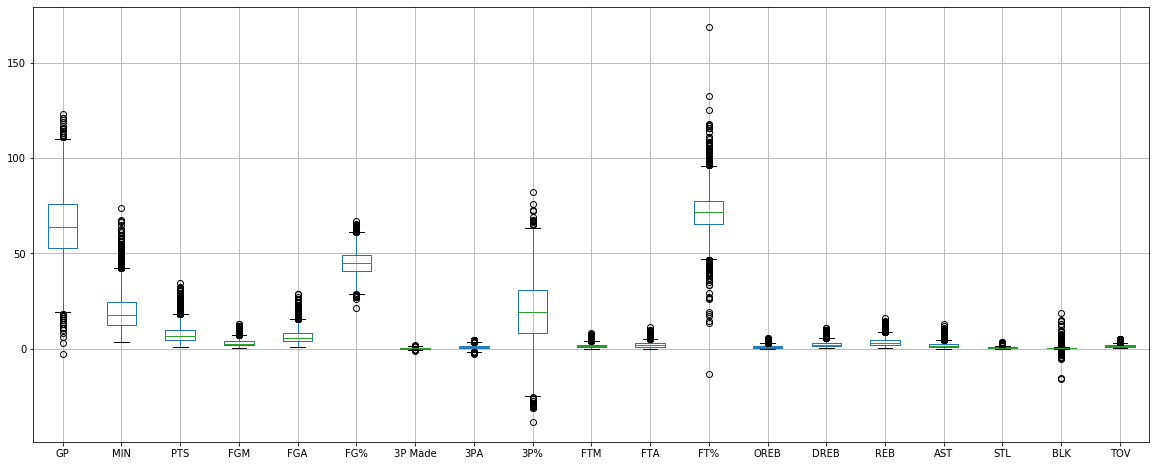

In [22]:
# plot the distribution of class 1 variables
boxplot_one = df_one.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (20,8))

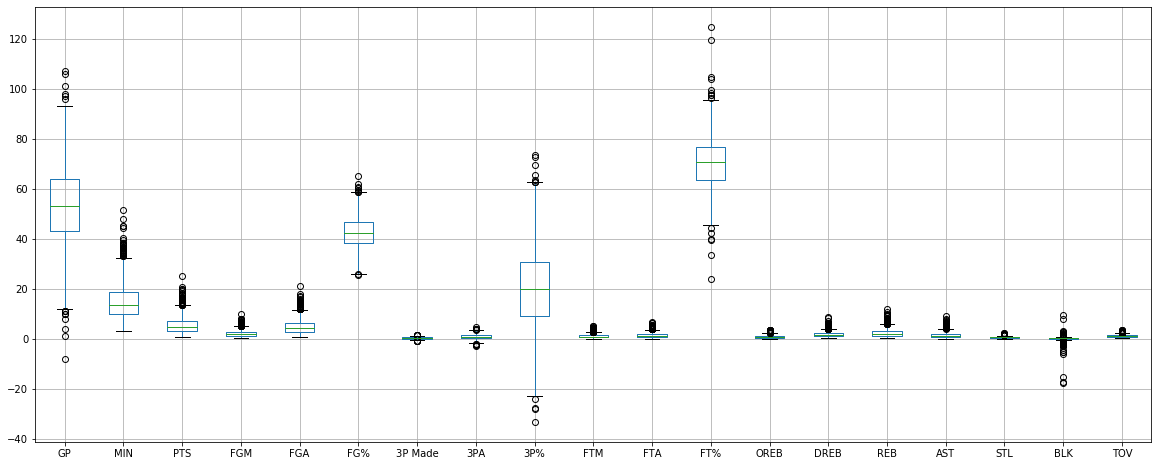

In [23]:
# plot the distribution of class 0 variables
boxplot_zero = df_zero.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (20,8))

In [25]:
neg_3p_perc = df_train[df_train['3P%'] <0 ]
print(neg_3p_perc)

      Id_old     Id  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  FTA  \
6       2677   3805  70  20.6   7.0  3.2   5.4  58.9      0.1 -0.1  ...  1.4   
9       3040   3808  64  33.4  16.9  6.4  11.3  59.0      0.3  1.1  ...  4.9   
12     13144   3811  41   9.8   2.3  0.9   2.3  37.9     -0.4 -0.6  ...  1.3   
19       829   3818  64  10.4   5.1  2.2   4.9  45.5     -0.1 -0.2  ...  1.8   
31      6039   3830  35  14.7   4.5  1.9   3.5  52.2     -0.2 -0.5  ...  1.5   
...      ...    ...  ..   ...   ...  ...   ...   ...      ...  ...  ...  ...   
7973    7825  11772  46   9.9   3.8  1.4   2.7  51.7     -0.8 -2.3  ...  1.4   
7983   11271  11782  75  17.5   7.8  2.9   5.9  49.0     -0.2 -0.6  ...  3.5   
7984     806  11783  59  21.0   8.1  2.9   5.3  55.9      0.0  0.1  ...  2.6   
7990   13494  11789  63  10.6   4.8  1.8   3.2  54.6     -0.3 -0.8  ...  1.7   
7991    7895  11790  60  18.3   8.9  3.8   7.5  48.4     -0.2 -0.5  ...  2.3   

       FT%  OREB  DREB   REB  AST  STL 

In [31]:
neg_3p_perc[['3P Made','3PA','3P%']].head(50)

,3P Made,3PA,3P%
6,0.1,-0.1,-3.6
9,0.3,1.1,-13.0
12,-0.4,-0.6,-4.7
19,-0.1,-0.2,-6.1
31,-0.2,-0.5,-30.2
38,0.4,1.1,-11.4
39,0.0,-0.1,-0.3
43,-0.3,-0.6,-4.3
48,0.1,0.5,-3.4
50,-0.7,-1.6,-5.2


The percentage columns are not calculations of other columns, or have already been normalised over the length of the players careers or something like that.

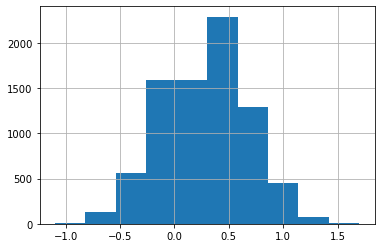

In [33]:
df_train['3P Made'].hist()

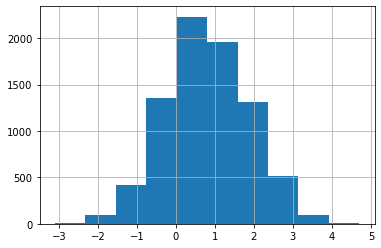

In [34]:
df_train['3PA'].hist()

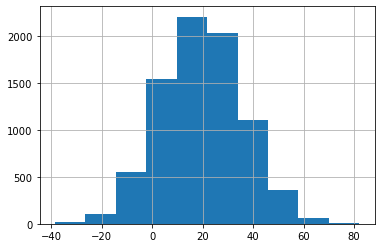

In [35]:
df_train['3P%'].hist()

# interpretation

The distribution of each class is very similar, the average stats for class 1 are slightly higher, but the std is almost the same as the 0 class.

Model will have difficulty differentiating between the two, since the values are so similar.

There needs to be a way of better differentiating between the two classes. 

In [36]:
# lets look at the test data
test = pd.read_csv('../data/raw/test (1).csv')

In [37]:
test.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,...,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,...,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,...,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,...,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,...,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,...,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,...,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,...,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


In [38]:
# normalise the training data, and an average column of all stats.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [39]:
# remove id
df_cleaned = df_train.copy()
df_cleaned.drop('Id_old', axis=1, inplace=True)

In [40]:
df_cleaned.shape

(8000, 21)

In [41]:
# remove id
df_cleaned.drop('Id', axis=1, inplace=True)

In [54]:
df_cleaned.shape

(8000, 19)

In [55]:
df_cleaned

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8
7998,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5


In [52]:
#df_cleaned[df_cleaned<0] = 0

In [43]:
# create Y
target = df_cleaned.pop('TARGET_5Yrs')

In [57]:
# standardise
df_cleaned.iloc[:,0:18] = scaler.fit_transform(df_cleaned.iloc[:,0:18])

In [58]:
df_cleaned.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000
mean,-9.414691e-17,2.629008e-16,-1.243450e-16,9.037215e-17,4.973799e-17,2.504663e-16,1.154632e-16,5.240253e-17,2.029488e-16,2.371436e-16,7.105427e-18,-1.452616e-15,-4.440892e-19,8.792966e-17,-1.452172e-16,-2.664535e-18,7.416290e-17,4.884981e-18,1.257763
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.723270
min,-4.134776e+00,-1.754581e+00,-1.497544e+00,-1.480592e+00,-1.515264e+00,-3.786944e+00,-3.552812e+00,-3.691743e+00,-3.629742e+00,-1.503653e+00,-1.555400e+00,-8.117688e+00,-1.371956e+00,-1.414013e+00,-1.412598e+00,-1.198105e+00,-1.591478e+00,-2.210175e+01,0.100000
25%,-6.880523e-01,-7.360806e-01,-7.333832e-01,-7.128452e-01,-7.340867e-01,-6.838105e-01,-6.887434e-01,-6.754302e-01,-6.988871e-01,-7.477906e-01,-7.568531e-01,-6.103500e-01,-7.355170e-01,-7.675251e-01,-7.411425e-01,-6.818436e-01,-8.554636e-01,-1.768759e-01,0.700000
50%,1.297633e-02,-1.988496e-01,-2.239426e-01,-2.403858e-01,-2.319015e-01,-3.393951e-02,9.236621e-02,-1.561178e-02,-5.230546e-03,-2.078891e-01,-1.978700e-01,3.276670e-03,-2.263656e-01,-1.928690e-01,-2.135707e-01,-2.393335e-01,-1.194490e-01,-5.507101e-02,1.100000
75%,6.555859e-01,5.510353e-01,5.170620e-01,5.273606e-01,5.213764e-01,6.646718e-01,6.131059e-01,6.442066e-01,6.884260e-01,5.479730e-01,5.208225e-01,5.881396e-01,5.373616e-01,5.254512e-01,5.058455e-01,4.244318e-01,6.165655e-01,1.885387e-01,1.600000
max,3.518119e+00,6.180768e+00,6.236691e+00,6.078758e+00,6.324406e+00,3.670325e+00,3.737544e+00,3.660519e+00,3.906743e+00,7.242752e+00,7.308475e+00,9.351495e+00,5.628876e+00,6.343844e+00,6.069330e+00,8.242111e+00,7.240697e+00,2.272243e+01,5.300000


In [59]:
# make a new column which is the average of all stats
df_cleaned['all_mean'] = df_cleaned.mean(axis=1)

In [60]:
df_cleaned.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,all_mean
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,-9.414691e-17,2.629008e-16,-1.243450e-16,9.037215e-17,4.973799e-17,2.504663e-16,1.154632e-16,5.240253e-17,2.029488e-16,2.371436e-16,7.105427e-18,-1.452616e-15,-4.440892e-19,8.792966e-17,-1.452172e-16,-2.664535e-18,7.416290e-17,4.884981e-18,1.257763,0.066198
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.723270,0.635694
min,-4.134776e+00,-1.754581e+00,-1.497544e+00,-1.480592e+00,-1.515264e+00,-3.786944e+00,-3.552812e+00,-3.691743e+00,-3.629742e+00,-1.503653e+00,-1.555400e+00,-8.117688e+00,-1.371956e+00,-1.414013e+00,-1.412598e+00,-1.198105e+00,-1.591478e+00,-2.210175e+01,0.100000,-1.655582
25%,-6.880523e-01,-7.360806e-01,-7.333832e-01,-7.128452e-01,-7.340867e-01,-6.838105e-01,-6.887434e-01,-6.754302e-01,-6.988871e-01,-7.477906e-01,-7.568531e-01,-6.103500e-01,-7.355170e-01,-7.675251e-01,-7.411425e-01,-6.818436e-01,-8.554636e-01,-1.768759e-01,0.700000,-0.390722
50%,1.297633e-02,-1.988496e-01,-2.239426e-01,-2.403858e-01,-2.319015e-01,-3.393951e-02,9.236621e-02,-1.561178e-02,-5.230546e-03,-2.078891e-01,-1.978700e-01,3.276670e-03,-2.263656e-01,-1.928690e-01,-2.135707e-01,-2.393335e-01,-1.194490e-01,-5.507101e-02,1.100000,-0.029091
75%,6.555859e-01,5.510353e-01,5.170620e-01,5.273606e-01,5.213764e-01,6.646718e-01,6.131059e-01,6.442066e-01,6.884260e-01,5.479730e-01,5.208225e-01,5.881396e-01,5.373616e-01,5.254512e-01,5.058455e-01,4.244318e-01,6.165655e-01,1.885387e-01,1.600000,0.438676
max,3.518119e+00,6.180768e+00,6.236691e+00,6.078758e+00,6.324406e+00,3.670325e+00,3.737544e+00,3.660519e+00,3.906743e+00,7.242752e+00,7.308475e+00,9.351495e+00,5.628876e+00,6.343844e+00,6.069330e+00,8.242111e+00,7.240697e+00,2.272243e+01,5.300000,3.430231


In [62]:
# add back onto original df
df_train['mean_stats'] = df_cleaned['all_mean']


In [63]:
df_train.

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,mean_stats
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1,0.434518
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1,0.597970
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1,-0.139306
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1,0.093481
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1,-0.114420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1,-0.784888
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1,-0.721361
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1,0.616518
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1,-0.828151


In [78]:
# add a column which is the field goal rate (FG% x GP x MIN)
df_train['FG Rate'] = (df_cleaned['FG%']/100)* df_cleaned['GP']* df_cleaned['MIN']

In [79]:
df_train.groupby(['TARGET_5Yrs']).mean()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,mean_stats,FG Rate
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,,,
0,6694.645379,7764.149512,53.501127,14.932682,5.507739,2.111270,4.928325,42.420210,0.251615,0.808340,...,70.445304,0.774305,1.644778,2.425620,1.330804,0.531555,0.063937,1.012923,-0.223261,-0.003837
1,6889.367971,7805.355676,64.629330,19.303929,7.618219,2.945899,6.491243,45.045719,0.267102,0.818204,...,71.549543,1.138417,2.273024,3.408892,1.683131,0.672065,0.281392,1.306628,0.123968,0.001274


In [80]:
# add a column which is the 3-point rate (3P% x GP x MIN)
df_train['3P Rate'] = (df_cleaned['3P%']/100)* df_cleaned['GP']* df_cleaned['MIN']

# add a column which is the Free throw rate (FT% x GP x MIN)
df_train['FT Rate'] = (df_cleaned['FT%']/100)* df_cleaned['GP']* df_cleaned['MIN']

# add a column which is the 3-point rate (3P% x GP x MIN)
df_train['3P Rate'] = (df_cleaned['3P%']/100)* df_cleaned['GP']* df_cleaned['MIN']

# offensive stats combined
df_train['offensive'] = df_cleaned['OREB']+df_cleaned['REB']+df_cleaned['AST']

# defensive combined
df_train['defensive'] = df_cleaned['DREB']+df_cleaned['STL']+df_cleaned['BLK']

In [81]:
# lets clean it up and create new splits
df_train.drop('Id_old', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

# we won't make negtive values zero this time, since they may mean something if it's a normalised value

In [83]:
df_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,STL,BLK,TOV,TARGET_5Yrs,mean_stats,FG Rate,3P Rate,FT Rate,offensive,defensive
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,...,1.1,0.2,1.6,1,0.434518,0.001142,0.001215,0.000454,2.856365,0.931134
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,...,0.5,0.6,1.4,1,0.597970,0.004391,0.002465,-0.000881,4.137514,1.167468
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,...,0.4,0.2,0.6,1,-0.139306,-0.000223,0.000699,0.000316,-1.621736,-0.929897
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,...,0.4,0.1,1.9,1,0.093481,0.000010,0.000002,-0.000003,-0.341877,-0.908038
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,...,0.4,0.6,0.7,1,-0.114420,-0.000011,0.000004,0.000019,1.573466,0.203810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,...,0.3,0.2,0.4,1,-0.784888,-0.013210,0.004146,-0.010251,-2.464660,-1.175236
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,...,0.0,0.3,0.3,1,-0.721361,0.004798,-0.007435,-0.000876,-1.820691,-2.292269
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,...,1.2,0.2,1.8,1,0.616518,0.001116,0.003509,-0.002233,1.140687,1.248304
7998,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,...,0.3,0.3,0.5,1,-0.828151,-0.012387,-0.006640,0.004757,-3.038238,-1.915415


In [84]:
target = df_train.pop('TARGET_5Yrs')

In [92]:
df_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,AST,STL,BLK,TOV,mean_stats,FG Rate,3P Rate,FT Rate,offensive,defensive
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,...,3.2,1.1,0.2,1.6,0.434518,0.001142,0.001215,0.000454,2.856365,0.931134
1,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,...,0.7,0.5,0.6,1.4,0.597970,0.004391,0.002465,-0.000881,4.137514,1.167468
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,...,0.8,0.4,0.2,0.6,-0.139306,-0.000223,0.000699,0.000316,-1.621736,-0.929897
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,...,1.8,0.4,0.1,1.9,0.093481,0.000010,0.000002,-0.000003,-0.341877,-0.908038
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,...,0.4,0.4,0.6,0.7,-0.114420,-0.000011,0.000004,0.000019,1.573466,0.203810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,...,0.5,0.3,0.2,0.4,-0.784888,-0.013210,0.004146,-0.010251,-2.464660,-1.175236
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,...,0.1,0.0,0.3,0.3,-0.721361,0.004798,-0.007435,-0.000876,-1.820691,-2.292269
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,...,3.4,1.2,0.2,1.8,0.616518,0.001116,0.003509,-0.002233,1.140687,1.248304
7998,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,0.6,...,0.2,0.3,0.3,0.5,-0.828151,-0.012387,-0.006640,0.004757,-3.038238,-1.915415


In [87]:
# do the same to the test set
# remove id
test_cleaned = test.copy()



In [88]:
test_cleaned.drop('Id_old', axis=1, inplace=True)
test_cleaned.drop('Id', axis=1, inplace=True)

In [89]:
test_cleaned

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [90]:
# standardise test
test_cleaned.iloc[:,0:18] = scaler.transform(test_cleaned.iloc[:,0:18])

test['mean_stats'] = test_cleaned.mean(axis=1)

In [93]:
test.drop('Id_old', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [94]:
# add a column which is the field goal rate (FG% x GP x MIN)
test['FG Rate'] = (test_cleaned['FG%']/100)* test_cleaned['GP']* test_cleaned['MIN']

# add a column which is the 3-point rate (3P% x GP x MIN)
test['3P Rate'] = (test_cleaned['3P%']/100)* test_cleaned['GP']* test_cleaned['MIN']

# add a column which is the Free throw rate (FT% x GP x MIN)
test['FT Rate'] = (test_cleaned['FT%']/100)* test_cleaned['GP']* test_cleaned['MIN']

# add a column which is the 3-point rate (3P% x GP x MIN)
test['3P Rate'] = (test_cleaned['3P%']/100)* test_cleaned['GP']* test_cleaned['MIN']

# offensive stats combined
test['offensive'] = test_cleaned['OREB']+test_cleaned['REB']+test_cleaned['AST']

# defensive combined
test['defensive'] = test_cleaned['DREB']+test_cleaned['STL']+test_cleaned['BLK']

In [96]:
test.rename(columns={'all_mean':'mean_stats'}, inplace=True)

In [97]:
test

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,AST,STL,BLK,TOV,mean_stats,FG Rate,3P Rate,FT Rate,offensive,defensive
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,...,0.4,0.2,0.3,0.8,-0.540910,-0.000620,-0.003224,-0.003208,-1.488743,-2.017089
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,...,3.5,0.6,0.0,1.8,0.266927,-0.000211,-0.000907,-0.000353,-0.189378,-1.329319
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,...,2.5,1.3,0.3,2.0,0.875283,0.003101,0.030348,-0.000306,1.530240,2.477431
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,...,4.1,0.9,0.1,3.6,1.455815,-0.011013,-0.015080,-0.001772,3.204649,1.180637
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,...,1.5,0.5,-0.4,0.9,-0.264933,-0.001468,0.002342,0.001040,-2.334042,-2.277372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,...,1.5,0.6,0.3,2.0,0.213756,0.003307,-0.005479,-0.001140,1.268684,0.041744
3795,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,...,0.4,0.4,0.4,0.7,-0.238719,-0.000070,0.000028,-0.004162,0.442645,0.032032
3796,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,...,0.4,0.4,0.2,0.5,-0.791279,-0.001360,-0.006130,-0.003971,-2.125182,-1.504553
3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,...,3.7,1.3,0.3,2.4,1.162389,0.003248,0.010812,0.057823,3.149447,2.980255


In [154]:
test.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'mean_stats', 'FG Rate', '3P Rate', 'FT Rate', 'offensive',
       'defensive'],
      dtype='object')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=8)

In [100]:
# save them all out to data/processed folder

np.save('../data/processed/X_train_fe', X_train)
np.save('../data/processed/X_val_fe',   X_val)
np.save('../data/processed/y_train_fe', y_train)
np.save('../data/processed/y_val_fe',   y_val)
np.save('../data/processed/X_test_fe', test)

In [119]:
np.save('../data/processed/X_test_fe', test)

# try a simple xgboost and get an variable importance plot

In [ ]:
# 

In [101]:
from xgboost import XGBClassifier

In [102]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:51:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
# predict class
y_train_preds = model.predict(X_train)
y_val_preds = model.predict(X_val)

In [104]:
# predict proabilities
y_train_preds_prob = model.predict_proba(X_train)
y_val_preds_prob = model.predict_proba(X_val)

In [105]:
from src.features.helper_functions import result_metrics
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 98.83%
Precision: 98.61% 
Recall: 100.00% 
AUC using prediction probabilities: 99.981% 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1074
           1       0.99      1.00      0.99      5326

    accuracy                           0.99      6400
   macro avg       0.99      0.97      0.98      6400
weighted avg       0.99      0.99      0.99      6400

Confusion Matrix
[[ 999   75]
 [   0 5326]]


In [106]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 82.06%
Precision: 84.83% 
Recall: 95.76% 
AUC using prediction probabilities: 64.674% 
              precision    recall  f1-score   support

           0       0.32      0.11      0.16       257
           1       0.85      0.96      0.90      1343

    accuracy                           0.82      1600
   macro avg       0.58      0.53      0.53      1600
weighted avg       0.76      0.82      0.78      1600

Confusion Matrix
[[  27  230]
 [  57 1286]]


<Figure size 1080x864 with 0 Axes>

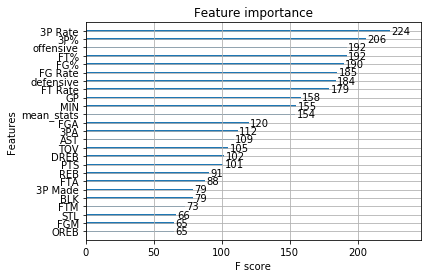

In [114]:
# get variable importance
from xgboost import plot_importance
plt.figure(figsize = (15,12))
plot_importance(model)

plt.show()

Seem liek the 3P rate is very important, as well as the offensive combined stats.

In [115]:
from src.features.helper_functions import save_model
save_model(model, 'rez_feateng_xgboost')

Model saved succesfully


In [124]:
print(X_train)
print(X_test)

      GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  ...  AST  STL  \
3617  64  13.9   4.3  1.5   3.6  43.0     -0.2 -0.1  11.9  1.4  ...  0.6  0.4   
1120  81  20.8   7.6  2.7   6.2  44.8      0.4  1.1  12.1  1.8  ...  0.7  0.6   
3873  50   5.6   1.4  0.5   1.5  36.4      0.0  0.5  -3.1  0.2  ...  1.5  0.4   
153   72  19.3   5.0  2.0   5.0  40.4      0.1  0.5  25.3  0.9  ...  1.1  0.5   
2960  45  19.7   6.1  2.5   5.9  42.1      0.1  0.4  -2.7  1.1  ...  1.5  0.4   
...   ..   ...   ...  ...   ...   ...      ...  ...   ...  ...  ...  ...  ...   
2181  74  46.4  18.7  7.4  16.3  45.3      0.8  2.3  42.2  3.1  ...  3.4  1.4   
2409  59  14.8   3.4  1.0   3.2  33.7      0.5  1.7  14.3  1.3  ...  1.5  0.9   
2033  55  15.6   3.3  1.1   2.4  44.4      0.6  1.8  32.0  0.7  ...  1.0  0.5   
1364  91  47.9  12.1  4.2   9.6  46.0      0.4  1.3  -0.6  3.2  ...  4.2  0.9   
4547  67  26.4  12.5  5.6  11.3  49.7     -0.3 -0.7  -4.8  2.0  ...  0.3  0.6   

      BLK  TOV  mean_stats 

### predict on test set


In [120]:
X_test = np.load('../data/processed/X_test_fe.npy')

In [125]:
# create an output for kaggle testing anyway.
y_test_preds = model.predict(test)
y_test_preds_prob = model.predict_proba(test)

In [126]:
print(y_test_preds)
print(y_test_preds_prob)

[1 1 1 ... 1 1 1]
[[1.7499107e-01 8.2500893e-01]
 [2.7855152e-01 7.2144848e-01]
 [8.2379580e-04 9.9917620e-01]
 ...
 [1.0646260e-01 8.9353740e-01]
 [2.5805080e-01 7.4194920e-01]
 [9.5755517e-02 9.0424448e-01]]


In [127]:
from collections import Counter
unique_elements, counts_elements = np.unique(y_test_preds, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [ 179 3620]]


In [128]:
179/3620

0.049447513812154696

In [129]:
from src.features.helper_functions import create_output

In [130]:
output = create_output(y_test_preds_prob)

In [131]:
output

,Id,TARGET_5Yrs
0,0,0.825009
1,1,0.721448
2,2,0.999176
3,3,0.999560
4,4,0.776056
...,...,...
3794,3794,0.996736
3795,3795,0.896328
3796,3796,0.893537
3797,3797,0.741949


In [132]:
# save to csv
output.to_csv('../data/processed/output_feateng_xgb_wk3.csv',index=False)

# KAGGLE SCORE = 0.65264

Tune it, see if we can improve it


In [133]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

In [134]:
space = {
    'max_depth' : hp.choice('max_depth', range(2, 10, 1)), # From exp 1 we know this should be pretty low
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.1,0.05),# from exp 1 this should be low too
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.05)
}

In [135]:
def objective(space):
    from sklearn.model_selection import cross_val_score
    
    xgboost = XGBClassifier(
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        subsample = space['subsample'],
        colsample_bytree = space['colsample_bytree']
    )
    
    auc = cross_val_score(xgboost, X_train, y_train, cv=10, scoring="roc_auc").mean()

    return{'loss': -auc, 'status': STATUS_OK }

In [136]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=5
)

[03:13:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:01<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:01<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:01<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:02<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:02<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/5 [00:02<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:02<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:03<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:04<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:05<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:06<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:13:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:07<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:08<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:09<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:10<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 1/5 [00:11<00:11,  2.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:12<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:12<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:13<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:14<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:14<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:15<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:16<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:16<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:17<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 2/5 [00:18<00:14,  4.81s/trial, best loss: -0.6796092400276563]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:18<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:19<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:19<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:19<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:20<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:20<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:20<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:21<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:21<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 3/5 [00:21<00:10,  5.35s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:22<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:22<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:23<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:24<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:24<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:25<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:26<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:26<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:27<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:14:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 4/5 [00:28<00:04,  4.78s/trial, best loss: -0.6904853232414927]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



100%|██████████| 5/5 [00:28<00:00,  5.74s/trial, best loss: -0.6904853232414927]


In [137]:
print("Best: ", best)

Best:  {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 7.0, 'subsample': 0.8500000000000001}


In [138]:
xgboost_best = XGBClassifier(
    max_depth = best['max_depth'],
    learning_rate = best['learning_rate'],
    min_child_weight = best['min_child_weight'],
    subsample = best['subsample'],
    colsample_bytree = best['colsample_bytree']
)

In [139]:
xgboost_best

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.75, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=5,
              min_child_weight=7.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.8500000000000001,
              tree_method=None, validate_parameters=None, verbosity=None)

In [140]:
# train model with new best features

model_best = xgboost_best.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:15:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
from src.features.helper_functions import save_model

In [101]:
save_model(model_xgb_smoteus_ho, 'rez_feateng_xgb_tune')

Model saved succesfully


In [142]:
# predict class
y_train_preds = model_best.predict(X_train)
y_val_preds = model_best.predict(X_val)

In [143]:
# predict proabilities
y_train_preds_prob = model_best.predict_proba(X_train)
y_val_preds_prob = model_best.predict_proba(X_val)

In [145]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 84.59%
Precision: 84.50% 
Recall: 99.79% 
AUC using prediction probabilities: 83.594% 
              precision    recall  f1-score   support

           0       0.90      0.09      0.17      1074
           1       0.84      1.00      0.92      5326

    accuracy                           0.85      6400
   macro avg       0.87      0.55      0.54      6400
weighted avg       0.85      0.85      0.79      6400

Confusion Matrix
[[  99  975]
 [  11 5315]]


In [146]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 83.62%
Precision: 84.27% 
Recall: 98.96% 
AUC using prediction probabilities: 69.054% 
              precision    recall  f1-score   support

           0       0.39      0.04      0.06       257
           1       0.84      0.99      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.62      0.51      0.49      1600
weighted avg       0.77      0.84      0.77      1600

Confusion Matrix
[[   9  248]
 [  14 1329]]


In [148]:
# create an output for kaggle testing
y_test_preds = model_best.predict(test)
y_test_preds_prob = model_best.predict_proba(test)

In [149]:
print(y_test_preds)
print(y_test_preds_prob)

[1 1 1 ... 1 1 1]
[[0.2688735  0.7311265 ]
 [0.19082302 0.809177  ]
 [0.03918219 0.9608178 ]
 ...
 [0.27899384 0.72100616]
 [0.10595757 0.89404243]
 [0.17116481 0.8288352 ]]


In [150]:
from collections import Counter
unique_elements, counts_elements = np.unique(y_test_preds, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [  43 3756]]


In [151]:
43/3756

0.011448349307774228

This is worse than the base model, no submission here.

In [155]:
# remove original columns used for features
X_train_small = X_train[['PTS', 'FGM', 'FGA','3P Made', '3PA','FTM',
       'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'mean_stats', 'FG Rate', '3P Rate', 'FT Rate', 'offensive',
       'defensive']]

X_val_small = X_val[['PTS', 'FGM', 'FGA','3P Made', '3PA','FTM',
       'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'mean_stats', 'FG Rate', '3P Rate', 'FT Rate', 'offensive',
       'defensive']]

X_test_small = test[['PTS', 'FGM', 'FGA','3P Made', '3PA','FTM',
       'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'mean_stats', 'FG Rate', '3P Rate', 'FT Rate', 'offensive',
       'defensive']]

In [157]:
model_small = model.fit(X_train_small, y_train)

[03:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
# predict class
y_train_preds = model_small.predict(X_train_small)
y_val_preds = model_small.predict(X_val_small)

In [160]:
# predict proabilities
y_train_preds_prob = model_small.predict_proba(X_train_small)
y_val_preds_prob = model_small.predict_proba(X_val_small)

In [161]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 98.00%
Precision: 97.65% 
Recall: 100.00% 
AUC using prediction probabilities: 99.959% 
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1074
           1       0.98      1.00      0.99      5326

    accuracy                           0.98      6400
   macro avg       0.99      0.94      0.96      6400
weighted avg       0.98      0.98      0.98      6400

Confusion Matrix
[[ 946  128]
 [   0 5326]]


In [162]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 82.69%
Precision: 85.02% 
Recall: 96.35% 
AUC using prediction probabilities: 63.268% 
              precision    recall  f1-score   support

           0       0.37      0.11      0.17       257
           1       0.85      0.96      0.90      1343

    accuracy                           0.83      1600
   macro avg       0.61      0.54      0.54      1600
weighted avg       0.77      0.83      0.79      1600

Confusion Matrix
[[  29  228]
 [  49 1294]]


In [163]:
# create an output for kaggle testing
y_test_preds = model_small.predict(X_test_small)
y_test_preds_prob = model_small.predict_proba(X_test_small)

In [164]:
print(y_test_preds)
print(y_test_preds_prob)

[1 1 1 ... 1 1 1]
[[0.36495924 0.63504076]
 [0.04308814 0.95691186]
 [0.0023486  0.9976514 ]
 ...
 [0.16113347 0.83886653]
 [0.21446127 0.78553873]
 [0.02847832 0.9715217 ]]


In [165]:
from collections import Counter
unique_elements, counts_elements = np.unique(y_test_preds, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [ 161 3638]]


In [166]:
161/3638

0.044255085211654756

<Figure size 1080x864 with 0 Axes>

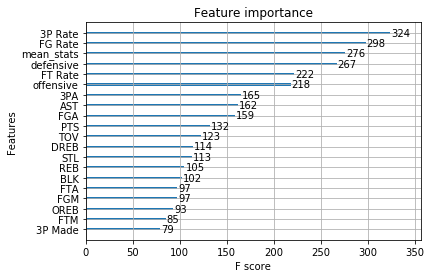

In [176]:
plt.figure(figsize = (15,12))
plot_importance(model_small)

plt.show()

In [167]:
from src.features.helper_functions import create_output

In [168]:
output = create_output(y_test_preds_prob)

In [169]:
output

,Id,TARGET_5Yrs
0,0,0.635041
1,1,0.956912
2,2,0.997651
3,3,0.998312
4,4,0.848482
...,...,...
3794,3794,0.984782
3795,3795,0.896992
3796,3796,0.838867
3797,3797,0.785539


In [132]:
# save to csv
#output.to_csv('../data/processed/output_feateng_small_xgb_wk3.csv',index=False)